<a href="https://colab.research.google.com/github/Syeda-Eman/Machine_Learning/blob/main/Wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing data and libraries**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [1]:
import kagglehub
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

Using Colab cache for faster access to the 'red-wine-quality-cortez-et-al-2009' dataset.


In [2]:
import os

# List the contents of the downloaded dataset directory
dataset_files = os.listdir(path)
print(f"Files in the dataset directory '{path}':")
for file_name in dataset_files:
    print(f"- {file_name}")

Files in the dataset directory '/kaggle/input/red-wine-quality-cortez-et-al-2009':
- winequality-red.csv


This will show you the files available in the dataset. Once you identify the CSV file (or other data file), you can load it into a pandas DataFrame. For example, if there's a file named `winequality-red.csv`, you would load it like this:

In [3]:
import pandas as pd

# Assuming 'winequality-red.csv' is one of the files listed
data_file_path = os.path.join(path, 'winequality-red.csv')

try:
    df = pd.read_csv(data_file_path)
    print(f"Successfully loaded data from {data_file_path}:")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{data_file_path}' was not found. Please check the filename in the directory listing.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully loaded data from /kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


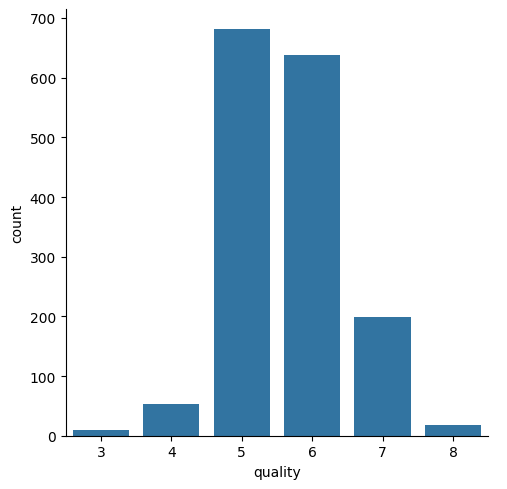

In [8]:
sns.catplot(x='quality', data = df, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

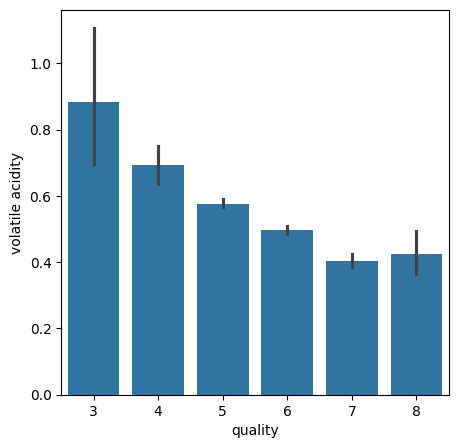

In [10]:
#volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

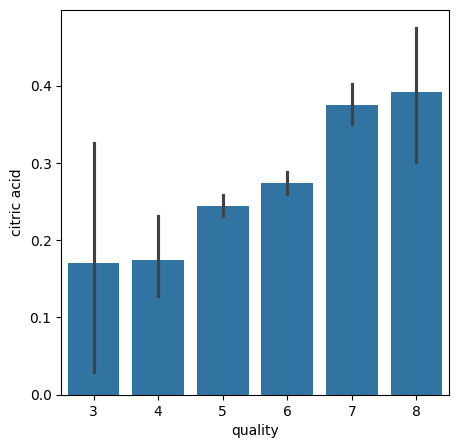

In [11]:
#citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = df)

In [13]:
correlation = df.corr()

<Axes: >

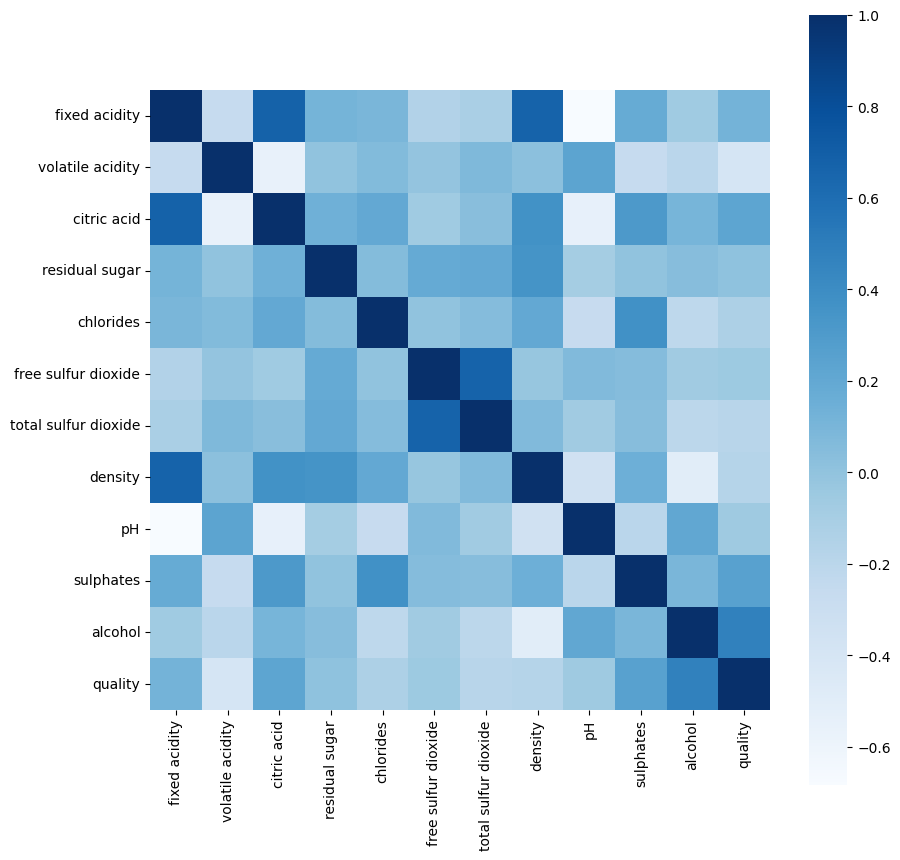

In [15]:
#constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square=True, fmt = '.1f', annot_kws={'size':8}, cmap = 'Blues')